In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
train_data=pd.read_csv('/content/train_v9rqX0R.csv')

In [102]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [103]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [104]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [105]:
train_data.shape

(8523, 12)

In [106]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [107]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Missing Values Handling

In [108]:
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

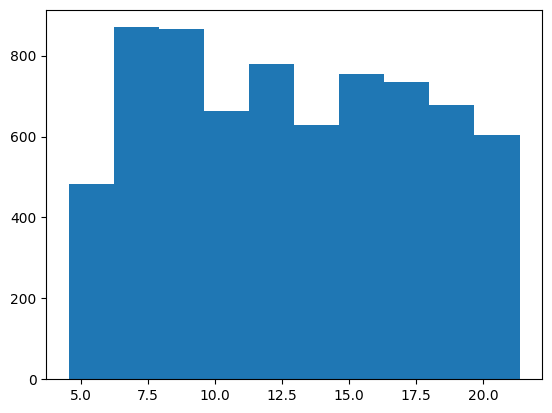

In [109]:
plt.hist(train_data['Item_Weight'])
plt.show()

In [110]:
train_data['Item_Weight'].skew()

0.0824262091221237

In [111]:
train_data['Item_Weight']=train_data['Item_Weight'].fillna(train_data['Item_Weight'].median())

In [112]:
train_data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [113]:
train_data['Outlet_Size']=train_data['Outlet_Size'].fillna('Medium')

In [114]:
train_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Encoding

In [116]:
x=train_data.drop(columns=['Item_Outlet_Sales'])
y=train_data['Item_Outlet_Sales']

In [117]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [118]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [119]:
train_data['Outlet_Identifier']=train_data['Outlet_Identifier'].str.replace('OUT',' ')

In [120]:
train_data['Outlet_Identifier']=train_data['Outlet_Identifier'].astype('int32')

In [121]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [122]:
# Make Item_fat_content column consistant

train_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [123]:
train_data['Item_Fat_Content']=train_data['Item_Fat_Content'].replace({'Low Fat': 'Low Fat','LF' : 'Low Fat','low fat' :'Low Fat','reg':'Regular'})

In [124]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [125]:
train_data['Item_Identifier'].str[:2].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

In [126]:
# using ONEHOT Encoding

train_data = pd.get_dummies(train_data)

In [127]:
train_data.dtypes

Item_Weight                      float64
Item_Visibility                  float64
Item_MRP                         float64
Outlet_Identifier                  int32
Outlet_Establishment_Year          int64
                                  ...   
Outlet_Location_Type_Tier 3        uint8
Outlet_Type_Grocery Store          uint8
Outlet_Type_Supermarket Type1      uint8
Outlet_Type_Supermarket Type2      uint8
Outlet_Type_Supermarket Type3      uint8
Length: 1593, dtype: object

In [128]:
train_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,49,1999,3735.1380,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,18,2009,443.4228,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,49,1999,2097.2700,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,10,1998,732.3800,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,13,1987,994.7052,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


Scalling

In [130]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_scale = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year']

train_data[columns_to_scale] = scaler.fit_transform(train_data[columns_to_scale])

In [76]:
train_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.282525,0.048866,0.927507,1.000000,0.583333,3735.1380,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0.081274,0.058705,0.072068,0.205128,1.000000,443.4228,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0.770765,0.051037,0.468288,1.000000,0.583333,2097.2700,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0.871986,0.000000,0.640093,0.000000,0.541667,732.3800,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,0.260494,0.000000,0.095805,0.076923,0.083333,994.7052,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [77]:
x=train_data.drop(columns=['Item_Outlet_Sales'])
y=train_data['Item_Outlet_Sales']

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

LinearRegression

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
model = LinearRegression()

In [84]:
model.fit(x_train, y_train)

LinearRegression()

In [86]:
y_pred = model.predict(x_test)

In [87]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [88]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean Squared Error (MSE):', mse)
print('R-squared (R2):', r2)


Coefficients: [ 4.94856949e+01 -9.54875582e+01 -2.65248087e+03 ...  2.73407929e+15
  2.73407929e+15  2.73407929e+15]
Intercept: -1106131696159606.5
Mean Squared Error (MSE): 8.862335928417074e+28
R-squared (R2): -3.2606451547307667e+22


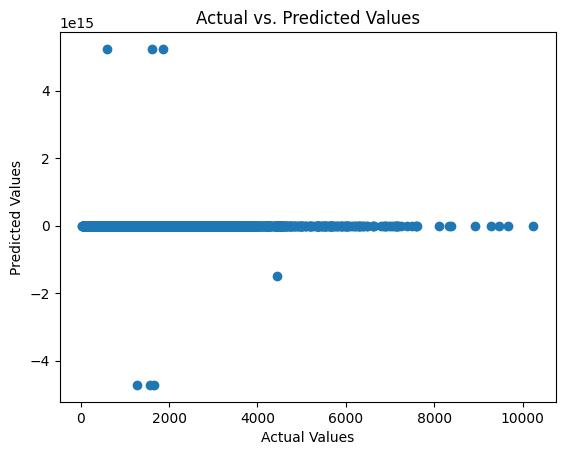

In [89]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

SVM

In [145]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [152]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [153]:
regressor = SVR(kernel='linear', C=1.0)

In [154]:
regressor.fit(x_train_scaled, y_train)

SVR(kernel='linear')

In [216]:
y_pred = regressor.predict(x_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [217]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [219]:
# Print evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('R-squared (R2):', r2)

Mean Squared Error (MSE): 1883199.6643697084
R-squared (R2): 0.30713009407278724


Decision Trees

In [135]:
from sklearn.tree import DecisionTreeRegressor

In [136]:
regressor = DecisionTreeRegressor(max_depth=None)

In [138]:
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [140]:
y_pred = regressor.predict(x_test)

In [141]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [142]:
# Print evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('R-squared (R2):', r2)

Mean Squared Error (MSE): 2090834.8251155636
R-squared (R2): 0.23073662554415286


Random Forest Regression:

In [155]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [156]:
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [159]:
regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [160]:
y_pred = regressor.predict(x_test)

In [161]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [162]:
print('Mean Squared Error (MSE):', mse)
print('R-squared (R2):', r2)


Mean Squared Error (MSE): 1200448.459728319
R-squared (R2): 0.5583290358960376


Based on the metrics, Random Forest Regression is the best model

# preprocessing test data

In [174]:
test_data=pd.read_csv('/content/test_AbJTz2l.csv')

In [175]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [176]:
test_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [177]:
test_data.shape

(5681, 11)

In [180]:
test_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

Missing Values Handling

In [179]:
test_data.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

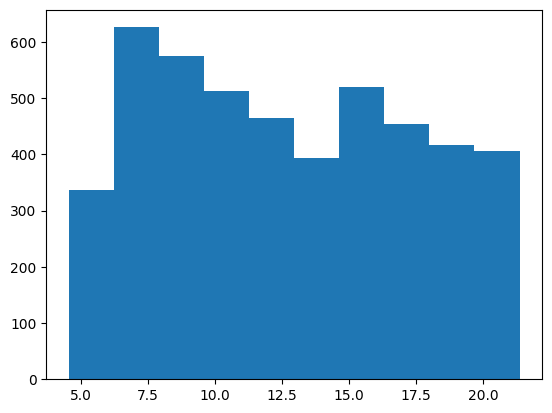

In [181]:
plt.hist(test_data['Item_Weight'])
plt.show()

In [182]:
test_data['Item_Weight'].skew()

0.12997502891537796

In [183]:
test_data['Item_Weight']=test_data['Item_Weight'].fillna(test_data['Item_Weight'].median())

In [184]:
test_data['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [186]:
test_data['Outlet_Size']=test_data['Outlet_Size'].fillna('Medium')

In [187]:
test_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Encoding

In [188]:
test_data['Outlet_Identifier']=test_data['Outlet_Identifier'].str.replace('OUT',' ')

In [189]:
test_data['Outlet_Identifier']=test_data['Outlet_Identifier'].astype('int32')

In [190]:
test_data['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [194]:
test_data['Item_Fat_Content']=test_data['Item_Fat_Content'].replace({'Low Fat': 'Low Fat','LF' : 'Low Fat','low fat' :'Low Fat','reg':'Regular'})

In [195]:
test_data['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [196]:
test_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [197]:
# using ONEHOT Encoding

test_data = pd.get_dummies(test_data)

In [198]:
test_data.dtypes

Item_Weight                      float64
Item_Visibility                  float64
Item_MRP                         float64
Outlet_Identifier                  int32
Outlet_Establishment_Year          int64
                                  ...   
Outlet_Location_Type_Tier 3        uint8
Outlet_Type_Grocery Store          uint8
Outlet_Type_Supermarket Type1      uint8
Outlet_Type_Supermarket Type2      uint8
Outlet_Type_Supermarket Type3      uint8
Length: 1576, dtype: object

Scalling

In [199]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_scale = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year']

test_data[columns_to_scale] = scaler.fit_transform(test_data[columns_to_scale])

In [200]:
test_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.964275,0.023374,0.323413,1.000000,0.583333,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0.222983,0.118737,0.235849,0.179487,0.916667,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,0.598095,0.307674,0.894140,0.000000,0.541667,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,0.164335,0.047548,0.524488,0.179487,0.916667,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0.473057,0.366458,0.862069,0.435897,0.000000,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [204]:
regressor = RandomForestRegressor(n_estimators=100, random_state=42)



In [209]:

train_data1=train_data.drop(columns=['Item_Outlet_Sales'])



In [210]:
train_data1

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.282525,0.048866,0.927507,1.000000,0.583333,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0.081274,0.058705,0.072068,0.205128,1.000000,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0.770765,0.051037,0.468288,1.000000,0.583333,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0.871986,0.000000,0.640093,0.000000,0.541667,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,0.260494,0.000000,0.095805,0.076923,0.083333,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.137541,0.172914,0.777729,0.076923,0.083333,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,0.227746,0.143069,0.326263,0.897436,0.708333,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
8520,0.359929,0.107148,0.228492,0.641026,0.791667,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,0.158083,0.442219,0.304939,0.205128,1.000000,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [212]:
regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [214]:
test_predictions = model.predict(test_data)

NotFittedError: ignored

In [166]:
model = RandomForestRegressor(n_estimators=100, random_state=42)


NotFittedError: ignored